# The Jupyter Notebook

<p> The document you are currently reading is called a Jupyter (formerly IPython) notebook. It allows the inclusion of HTML (text and images) with executable Python code. The document is broken up into "cells" which can be executed by selecting them and pressing <code>SHIFT-ENTER</code>. You can also execute the entire notebook at once by selecting <code>Run All</code> from the Cell menu in the toolbar at the top. </p>

<p> We will be using this notebook to demonstrate how to use REBOUND. The developer has several other notebooks <a href="https://github.com/hannorein/rebound/tree/master/python_tutorials">here</a> that demonstrate other functionalities of REBOUND.</p>


# Let's Do Some Simulating

In this Notebook, we will be simulating (also called "integrating") the Sun and two planets: Mercury and Jupiter. To start off lets <b>import</b> REBOUND into our Python environment. Remember that you can <code>SHIFT-ENTER</code> to execute a cell of code. Note that everything after the # symbol is an explanatory comment.

In [1]:
import rebound 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#This tells python to use rebound and two other standard libraries that we will be using

It is a good idea to start off REBOUND as follows:

In [2]:
rebound.reset(); 
rebound.G=4*np.pi*np.pi;   
rebound.integrator = 'IAS15';

The command rebound.reset() resets everything. You will need to do this again each time you change parameters in order to resimulate.
The value of rebound.G is Newton's gravitational constant (G). 
Always use the value above, G=(2pi)^2, if you want your distances to be
in AU, time in yr, and masses in solar masses. 
Finally, the integrator 'IAS15' will always work; but some of the other choices will sometimes be faster.

Next, we can add each object that we want to simulate one at a time with the <code>add</code> method. We initialize our three objects by giving rebound their masses, semi-major axes, and eccentricities. 

In [3]:
rebound.add(m=1) # The Sun is at the center of our coordinate system and has a mass of 1.
rebound.add(m=1.66e-07, a=0.387, e=0.206) # Mercury
rebound.add(m=0.000955, a=5.20, e=0.0484) # Jupiter
rebound.move_to_com() # This allows us to work in the center of mass frame.  If you don't do this, all particles can drift together

In the above, m is the mass divided by the Sun's mass; a is the semimajor axis (which is roughly the average distance to the Sun) in units of astronomical units (AU; with Earth being at 1 AU); and e is the eccentricity. You can type ?rebound.add to get more info.  

We can check on the status of all of our objects with the <code>status</code> method:

In [4]:
rebound.status()

---------------------------------
Rebound version:     	1.1.0
Build on:            	Jun 19 2015 20:10:49
Number of particles: 	3
Simulation time:     	0.000000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.00472118713943 y=0.0 z=0.0 vx=0.0 vy=-0.00276271119712 vz=0.0>
<rebound.Particle object, m=1.66e-07 x=0.302556812861 y=0.0 z=0.0 vx=0.0 vy=12.444900363 vz=0.0>
<rebound.Particle object, m=0.000955 x=4.94359886387 y=0.0 z=0.0 vx=0.0 vy=2.89072810855 vz=0.0>
---------------------------------


<p> We can see that we have three rebound "particles" (i.e the Sun, Mercury, and Jupiter). Each particle has a mass (m), a position in three dimensional space (x,y,z) and a velocity in three dimensional space (vx,vy,vz). These are the initial <b>positions</b> and <b>velocities</b> for a our simulation. </p>


Now let's evolve our mini Solar System forward by 2 years, while outputting Mercury's position 100 times.

In [5]:
Noutputs = 100;
times = np.linspace(0,2,Noutputs) # This sets the "times" variable to be an array made up of 100 evenly spaced output times between 0 and 2.
x_mercury = np.zeros(Noutputs) #This makes an array made up of zeros. We will be 'filling up' this array shortly with the x-position of Mercury
vy_sun = np.zeros(Noutputs) #We will be filling up this array with the y-velocity of the Sun

If you're not sure what something is (e.g., what "times" is equal to here), you can easily evaluate it.  To do so, click on "Insert" above, then "Insert cell Below", then type "times" followed by shift+enter. 

The following is the loop that runs rebound.  It runs through all the times in the times array, simulating the planets up to each time.

In [6]:
for i,t in enumerate(times):
    rebound.integrate(t)         # Integrate forward in time by a month
    x_mercury[i] = rebound.particles[1].x  # Mercury is particle 1 in the list of particles. And the ".x" at the end says to use the x-position    
    vy_sun[i] = rebound.particles[0].vy #The sun is particle 0

Now that we have Mercury's postion every month let's plot it. The following uses matplotlib, the standard Python plotting package (we imported it above).

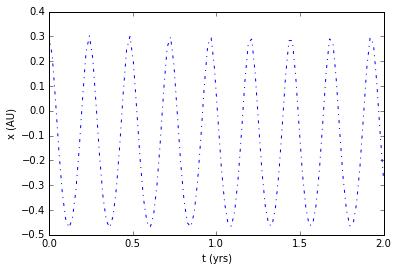

In [7]:
plt.plot(times,x_mercury,'-.');
plt.xlabel('t (yrs)'); plt.ylabel('x (AU)');

And let's plot the Sun's y-velocity:

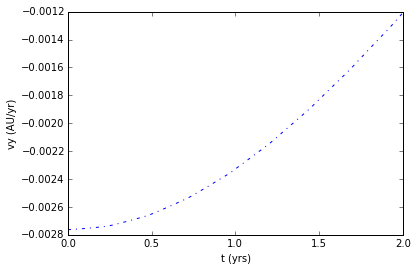

In [8]:
plt.plot(times,vy_sun,'-.');
plt.xlabel('t (yrs)'); plt.ylabel('vy (AU/yr)');